<a href="https://colab.research.google.com/github/Qbaxxx/Metody_analizy_danych_LAB_JBabinski/blob/main/Lab_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Zadanie 1

<ipython-input-2-4dd64d1d0948>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.plot(angles, values, linewidth=2, linestyle='solid', label=row[0])


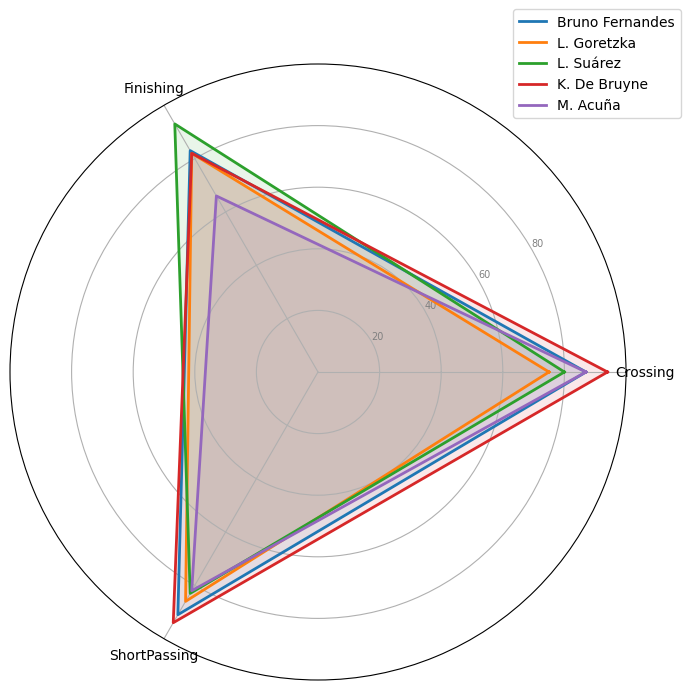

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt

from math import pi

def radar_plot(df):
    categories = list(df.columns[1:])
    N = len(categories)

    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    plt.figure(figsize=(8, 8))
    ax = plt.subplot(111, polar=True)

    for i, row in df.iterrows():
        values = row[1:].tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=2, linestyle='solid', label=row[0])
        ax.fill(angles, values, alpha=0.1)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    ax.set_rlabel_position(30)
    plt.yticks([20, 40, 60, 80], ["20", "40", "60", "80"], color="grey", size=7)
    plt.ylim(0, 100)
    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
    plt.show()

df = pd.read_csv('https://raw.githubusercontent.com/kropiak/swps-metody-analizy-danych/refs/heads/main/lab_08/data/FIFA22_official_data.csv')
sample = df[['Name', 'Crossing', 'Finishing', 'ShortPassing']].dropna().head(5)
radar_plot(sample)

Zadanie 2

In [3]:
url = 'https://raw.githubusercontent.com/kropiak/swps-metody-analizy-danych/refs/heads/main/lab_08/data/pkn.txt'
df = pd.read_csv(url, sep=',')

print(df.columns)

Index(['<TICKER>', '<PER>', '<DATE>', '<TIME>', '<OPEN>', '<HIGH>', '<LOW>',
       '<CLOSE>', '<VOL>', '<OPENINT>'],
      dtype='object')


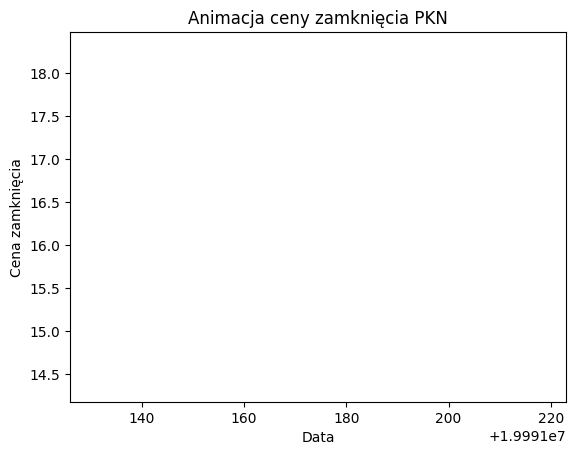

In [4]:
import matplotlib.animation as animation

dates = df['<DATE>']
prices = df['<CLOSE>']

fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)

def init():
    ax.set_xlim(dates.iloc[0], dates.iloc[19])
    ax.set_ylim(min(prices.iloc[:20]) * 0.95, max(prices.iloc[:20]) * 1.05)
    line.set_data([], [])
    return line,

def update(frame):
    x = dates.iloc[:20 + frame]
    y = prices.iloc[:20 + frame]
    line.set_data(x, y)
    ax.set_xlim(x.iloc[0], x.iloc[-1])
    ax.set_ylim(min(y) * 0.95, max(y) * 1.05)
    return line,

ani = animation.FuncAnimation(fig, update, frames=len(df) - 20,
                              init_func=init, blit=True, interval=200, repeat=False)
plt.xlabel('Data')
plt.ylabel('Cena zamknięcia')
plt.title('Animacja ceny zamknięcia PKN')
plt.show()

Zadanie 3

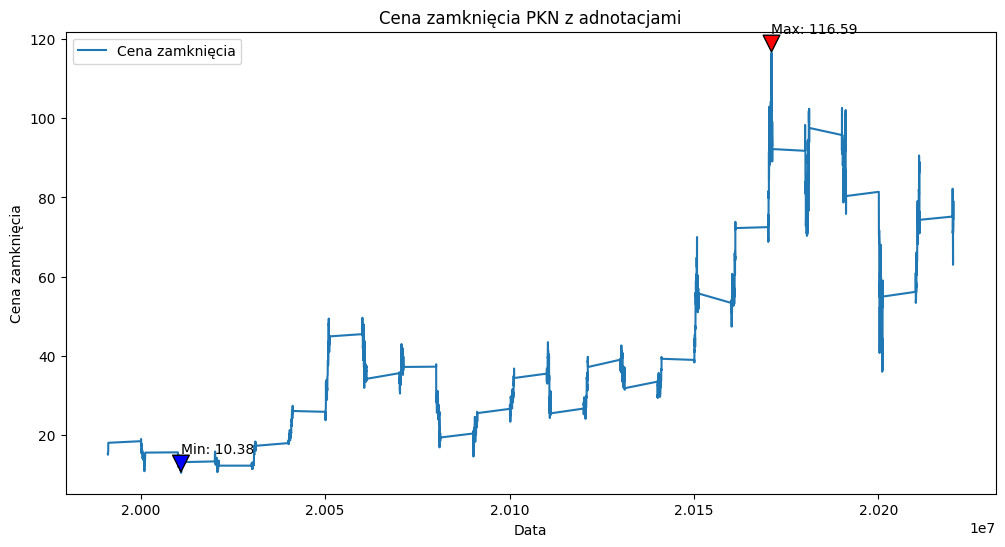

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(df['<DATE>'], df['<CLOSE>'], label='Cena zamknięcia')

min_idx = df['<CLOSE>'].idxmin()
max_idx = df['<CLOSE>'].idxmax()

plt.annotate(f"Min: {df['<CLOSE>'][min_idx]:.2f}", xy=(df['<DATE>'][min_idx], df['<CLOSE>'][min_idx]),
             xytext=(df['<DATE>'][min_idx], df['<CLOSE>'][min_idx] + 5),
             arrowprops=dict(facecolor='blue', shrink=0.05))

plt.annotate(f"Max: {df['<CLOSE>'][max_idx]:.2f}", xy=(df['<DATE>'][max_idx], df['<CLOSE>'][max_idx]),
             xytext=(df['<DATE>'][max_idx], df['<CLOSE>'][max_idx] + 5),
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.xlabel('Data')
plt.ylabel('Cena zamknięcia')
plt.title('Cena zamknięcia PKN z adnotacjami')
plt.legend()
plt.show()

Zadanie 4

In [6]:
if not pd.api.types.is_datetime64_any_dtype(df['<DATE>']):
    df['<DATE>'] = pd.to_datetime(df['<DATE>'], format='%Y%m%d', errors='coerce')

df['YEAR'] = df['<DATE>'].dt.year
df['MONTH'] = df['<DATE>'].dt.month

grouped = df.groupby(['YEAR', 'MONTH'])['<CLOSE>'].agg(['min', 'max']).reset_index()

def highlight_min_max(s):
    if s.name == 'min':
        return ['background-color: lightblue'] * len(s)
    elif s.name == 'max':
        return ['background-color: lightgreen'] * len(s)
    else:
        return [''] * len(s)

styled = grouped.style.apply(highlight_min_max, subset=['min', 'max'])
styled

,YEAR,MONTH,min,max
0,1999,11,14.923000,15.194000
1,1999,12,15.674000,17.950000
2,2000,1,17.256000,18.908000
3,2000,2,15.330000,17.806000
4,2000,3,15.268000,16.711000
5,2000,4,15.124000,16.088000
6,2000,5,13.957000,15.539000
7,2000,6,14.230000,15.403000
8,2000,7,13.886000,15.060000
9,2000,8,13.478000,14.371000
